In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt
import pickle
from generating_images import *
import PIL

pt = 0.3528 # mm/point, size of a font
px_size = 0.100 # electrode pixel size in mm

## Important note for Sloan and optometrist fonts

Only the letters CDHKNORSVZ are designated as the standard for acuity testing by the american authorities. The Sloan font extends to the complete uppercase alphabet, but the letters are not recognized as official testing letters. **The C is a Landolt C**. The font has no descenders, the height and width are equal to the nominal point size requested. Adjoining characters touch each others. <br>

According to Louis Sloan: *The design of the letters follows the Snellen principle in that the over-all height and width are five times the width of the strokes. The letters are of the familiar Gothic form and therefore differ from the Snellen capital letters in that the serifs are omitted.* The Landolt C has a gap width the size of a stroke width, which is a fifth of the overall letter size.<br>

The typography Point used as font size is defined as: **1 point = 1/72 inch = 0.3528 mm** <br>

Sources: 
 - [GitHub Eye-Chart-Fonts](https://github.com/denispelli/Eye-Chart-Fonts/)
 - [Wikipedia Typeface anatomy](https://en.wikipedia.org/wiki/Typeface_anatomy)
 - [Wikipedia Point (typography)](https://en.wikipedia.org/wiki/Point_(typography))
 - [Louis' Sloan paper](https://doi.org/10.1016/0002-9394(59)90626-9)


## First tests

### Testing basic shapes, and text

In [2]:
def generate_image_with_frame(width, height, objects, frame_width):
    # Create a blank white image
    image = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(image)
    
    font = ImageFont.load_default()
    #font = ImageFont.truetype("Solan.otf", size=60)  # Adjust the font size as needed

    # Draw a red square frame around the entire image
    draw.rectangle([0, 0, width - 1, height - 1], outline="red", width=frame_width)
    for obj in objects:
        if obj["type"] == "square":
            x, y, size, color = obj["x"], obj["y"], obj["size"], obj["color"]
            draw.rectangle([x, y, x + size, y + size], fill=color)
        elif obj["type"] == "circle":
            x, y, size, color = obj["x"], obj["y"], obj["size"], obj["color"]
            draw.ellipse([x, y, x + size, y + size], fill=color)
        elif obj["type"] == "text":
            x, y, text, font_size, font_color = obj["x"], obj["y"], obj["text"], obj["font_size"], obj["font_color"]
            #font = ImageFont.truetype("arial.ttf", font_size)
            draw.text((x, y), text, font=font, fill=font_color)
    return image

In [3]:
def generate_grating(width, height, frame_width, spatial_frequency, angle_degrees):
    # Create a blank white image
    image = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(image)

    # Convert angle to radians
    angle_radians = np.deg2rad(angle_degrees)
    # Compute the wavelength of the grating
    wavelength = 1 / spatial_frequency
    for x in range(width):
        for y in range(height):
            # Compute the position in the direction of the grating
            position = x * np.cos(angle_radians) + y * np.sin(angle_radians)
            # Compute the brightness of the pixel based on the position
            brightness = 255 if np.sin(2 * np.pi * position / wavelength) > 0 else 0
            # Set the pixel color
            draw.point((x, y), fill=(brightness, brightness, brightness))

    # Draw a red square frame around the entire image
    draw.rectangle([0, 0, width - 1, height - 1], outline="red", width=frame_width)

    return image

In [4]:
# Example usage:

# Type of objects to draw
objects = [
    {"type": "square", "x": 50, "y": 50, "size": 100, "color": "red"},
    {"type": "circle", "x": 200, "y": 100, "size": 80, "color": "blue"},
    {"type": "text", "x": 150, "y": 300, "text": "THIS IS A TEXT WITH default font", "font_size": 36, "font_color": "green"},
]

# Image size, frame characteristics
width, height = 400, 400
frame_width = 10

# Grating specs
spatial_frequency = 0.2  # Adjust the spatial frequency as needed
angle_degrees = 45  # Adjust the angle of the grating as needed

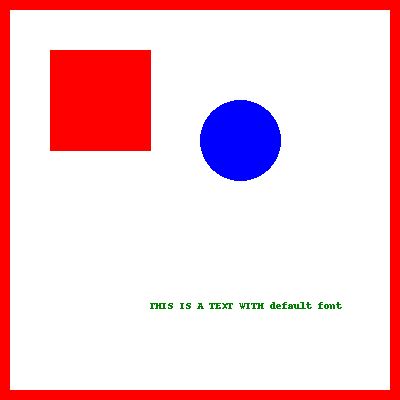

In [5]:
image_objects = generate_image_with_frame(width, height, objects, frame_width)
image_objects

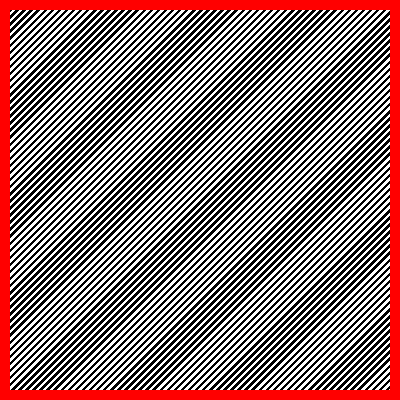

In [6]:
image_grating = generate_grating(width, height, frame_width, spatial_frequency, angle_degrees)
image_grating.save("generated_grating3.bmp")
image_grating

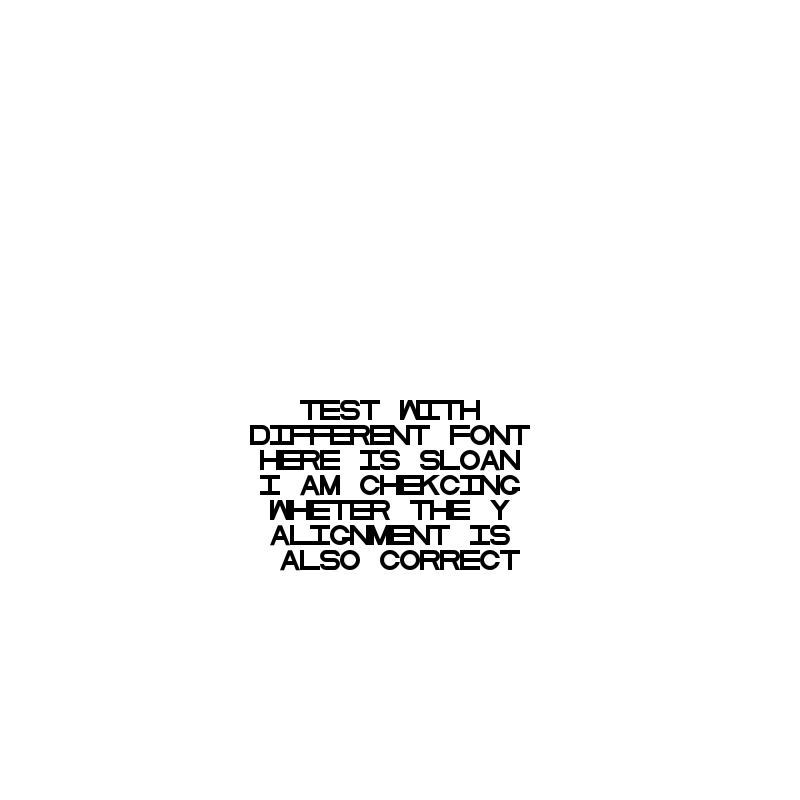

In [7]:
# Test cell 
width, height = 800, 800    

image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(image)

font = ImageFont.truetype('../Sloan.otf', size=20)  # Adjust the font size as needed

center_x, center_y = int(width/2), int(height/2)
text = 'TEST WITH \nDIFFERENT FONT \nHERE IS SLOAN \nI AM CHEKCING \nWHETER THE Y \nALIGNMENT IS \nALSO CORRECT'

center_x -= determine_text_offset(text, draw, font)
draw.text((center_x, center_y), text, font=font, fill="black", align='center')
image

## Testing with actual patterns

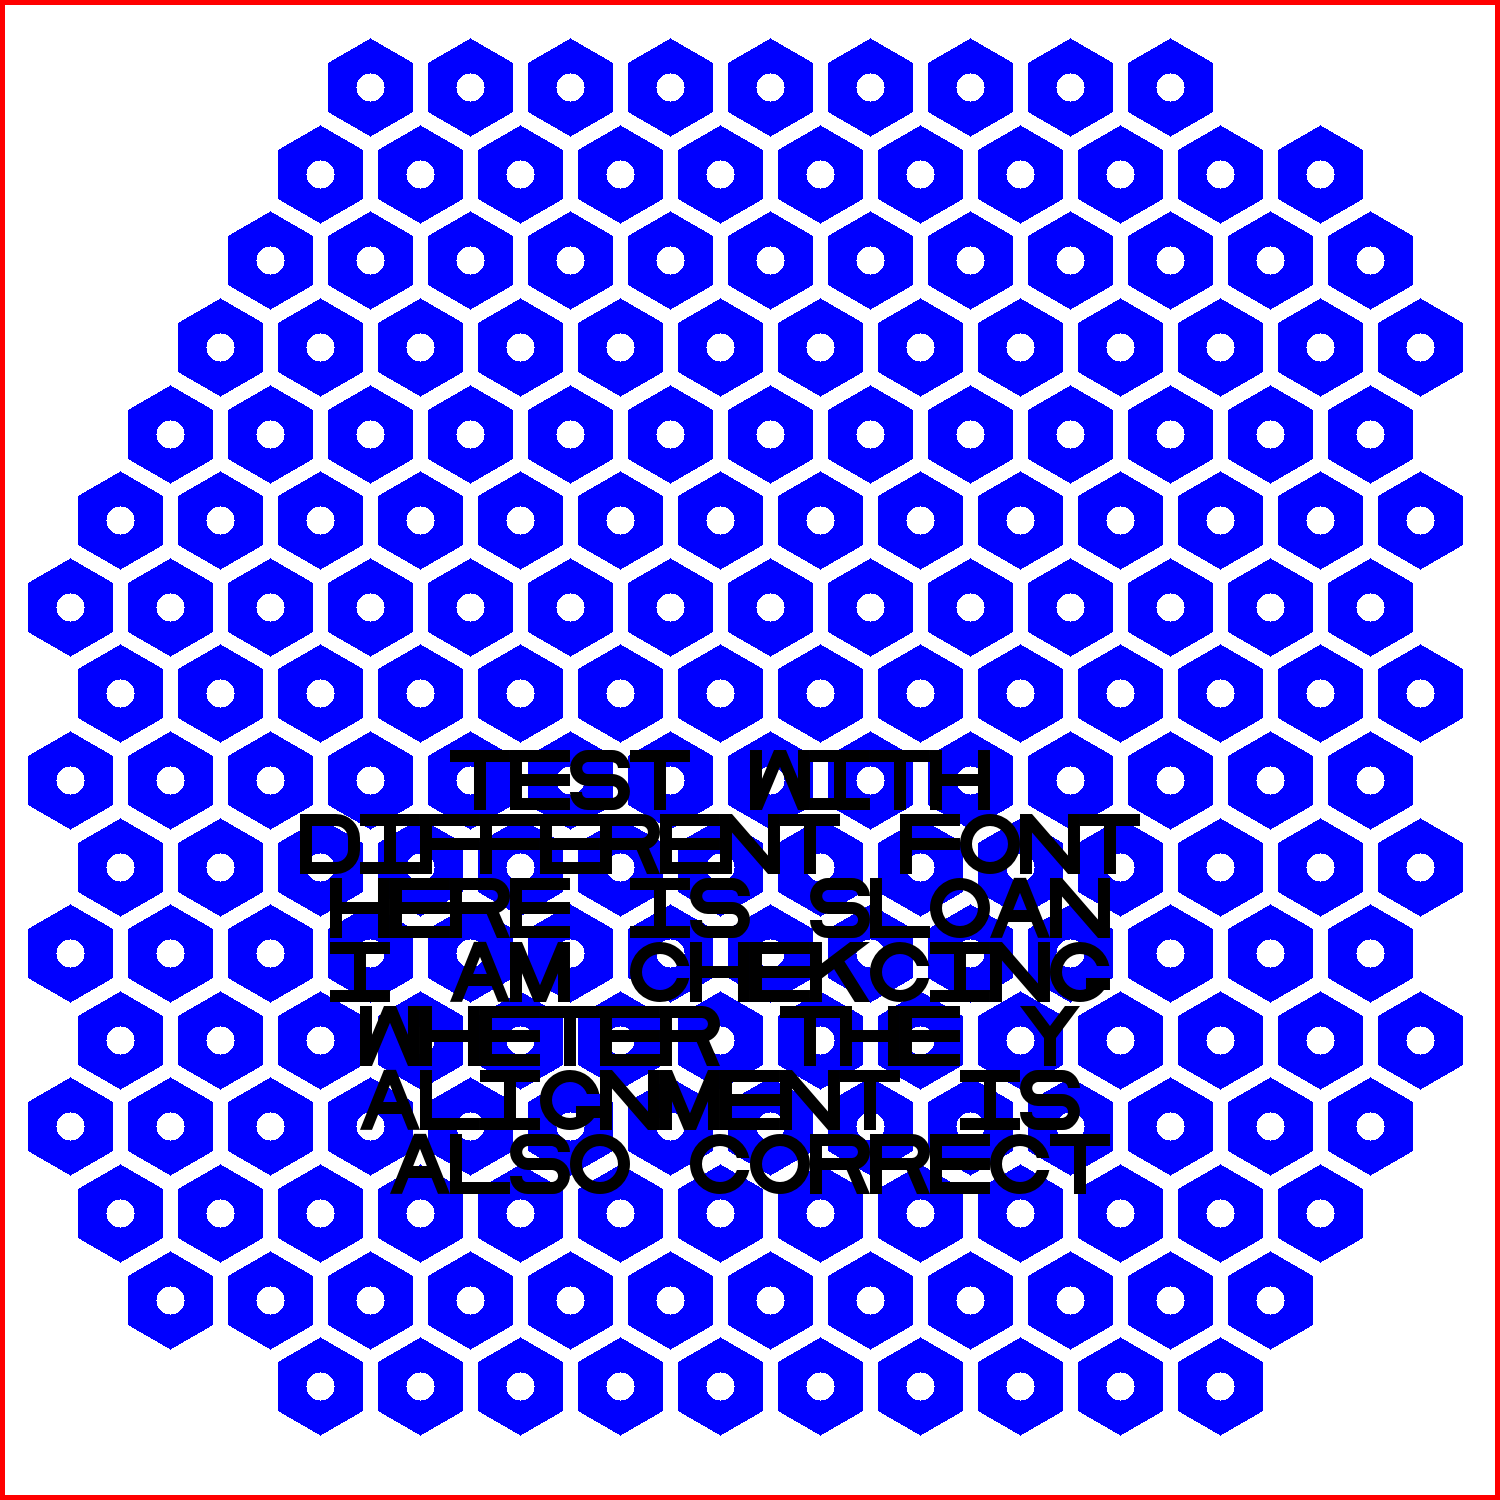

In [2]:
path = "../user_files/user_input/image_sequence/Grid_PS100.png"
background = Image.open(path, 'r')
width, height = background.size

# Convert the pixel pattern into a PIL drawing
draw = ImageDraw.Draw(background)
# Compute the font size 
im_px_size = 2 / 1500 # mm/px

font_size = 60
font = ImageFont.truetype('../Sloan.otf', size=font_size)  # Adjust the font size as needed

center_x, center_y = int(width/2), int(height/2)
text = 'TEST WITH \nDIFFERENT FONT \nHERE IS SLOAN \nI AM CHEKCING \nWHETER THE Y \nALIGNMENT IS \nALSO CORRECT'

center_x -= determine_text_offset(text, draw, font)
draw.text((center_x, center_y), text, font=font, fill="black", align='center')

background

### New tests for rotating the letters

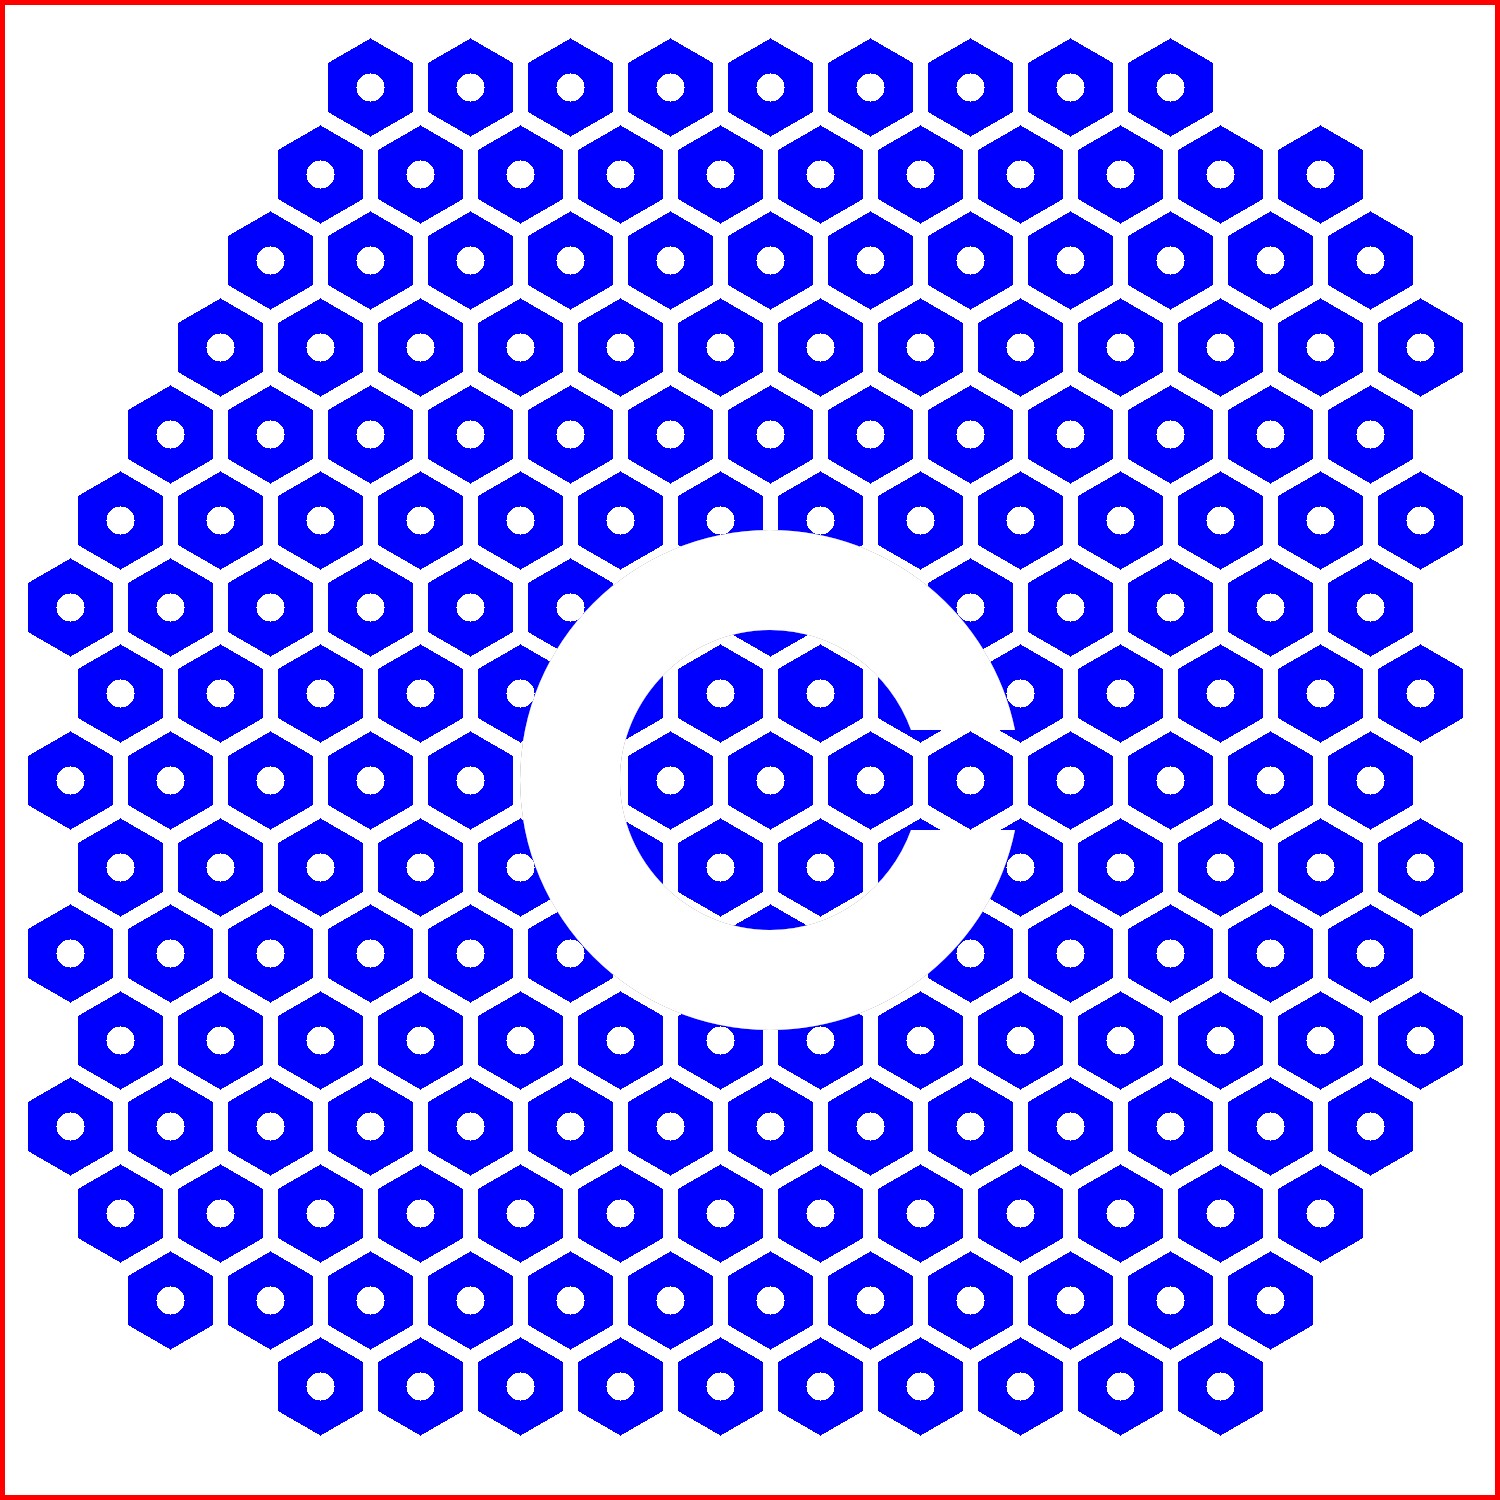

In [3]:
electrode_pixel_size = 100
electrode_label_number = 99
text = 'C'
letter_size = 5
position = (0, 0)
image_width = 1500 

# Define the size of the text image - TODO adapt for more than one letter
image_size = (electrode_pixel_size * letter_size, electrode_pixel_size * letter_size)

# Create a new image with a transparent background
text_image = Image.new('RGBA', image_size, (0, 0, 0, 0))

# Convert to drawing, set the font and write
text_drawing = ImageDraw.Draw(text_image)
font, center_x, center_y = determine_location_letter(electrode_pixel_size, electrode_label_number, text, letter_size, position)
text_drawing.text((0, 0), text, font=font, fill="white", align='center')

text_image = text_image.rotate(0, PIL.Image.NEAREST, expand = 1)
text_image.save("test.png")

# Merge onto the background
path = f"../user_files/user_input/image_sequence/Grid_PS{electrode_pixel_size}.png"
background = Image.open(path, 'r')

# Compute the new position taking into account the offset
center_x -= text_image.size[0]/2
center_y -= text_image.size[1]/2
position = (int(center_x), int(center_y))
background.paste(text_image, position, text_image)
background

## Test to find the central electrode 
A test for finding the location of the central electrode.

In [4]:
# Test cell 
from PIL import Image
# Load the hexagon image
file = f'../user_files/user_input/image_sequence/pixel_label_PS{electrode_pixel_size}.pkl'
with open(file, 'rb') as f:
    label = pickle.load(f)
mask = (label == 99).astype(int)

hexagon_image = Image.fromarray(mask)
# Find the bounding box
bbox = hexagon_image.getbbox()
# Calculate the center coordinates
center_x = int((bbox[0] + bbox[2]) / 2)
center_y = int((bbox[1] + bbox[3]) / 2)
# Print the center coordinates
print(f"Center coordinates: ({center_x}, {center_y})")

TypeError: Cannot handle this data type: (1, 1), <i8

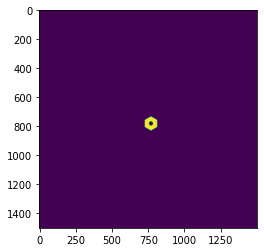

In [99]:
# Test cell 
electrode_pixel_size = 100
file = f'../user_files/user_input/image_sequence/pixel_label_PS{electrode_pixel_size}.pkl'
with open(file, 'rb') as f:
    label = pickle.load(f)

plt.imshow(label == 99)
maks = label == 99
mask = mask.astype(int)


Tests with label files

In [49]:
# Test cell 
file = '../user_files/user_input/image_sequence/pixel_label_PS100.pkl'
with open(file, 'rb') as f:
    label = pickle.load(f)

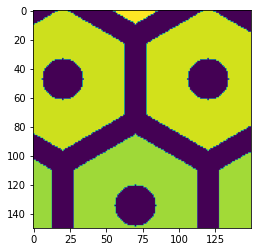

In [23]:
# Test cell
plt.imshow(label[300:450, 300:450])

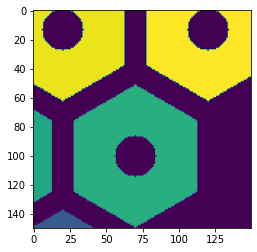

In [26]:
plt.imshow(label[1200:1350, 1200:1350])

In [38]:
np.max(label)

2806

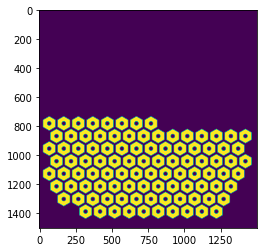

In [68]:
mask = (label < 100) & (label > 0)
plt.imshow(mask)

Call the functions

## First working functions

Same but with functions in Pyhton file

In [14]:
electrode_pixel_size = 100
electrode_label_number = 99
text = 'C'
letter_size = 5
position = (0,0)
font, center_x, center_y = determine_location_letter(electrode_pixel_size, electrode_label_number, text, letter_size, position)
overlay, projected = draw_overlay_projection(electrode_pixel_size, font, (center_x, center_y), text)

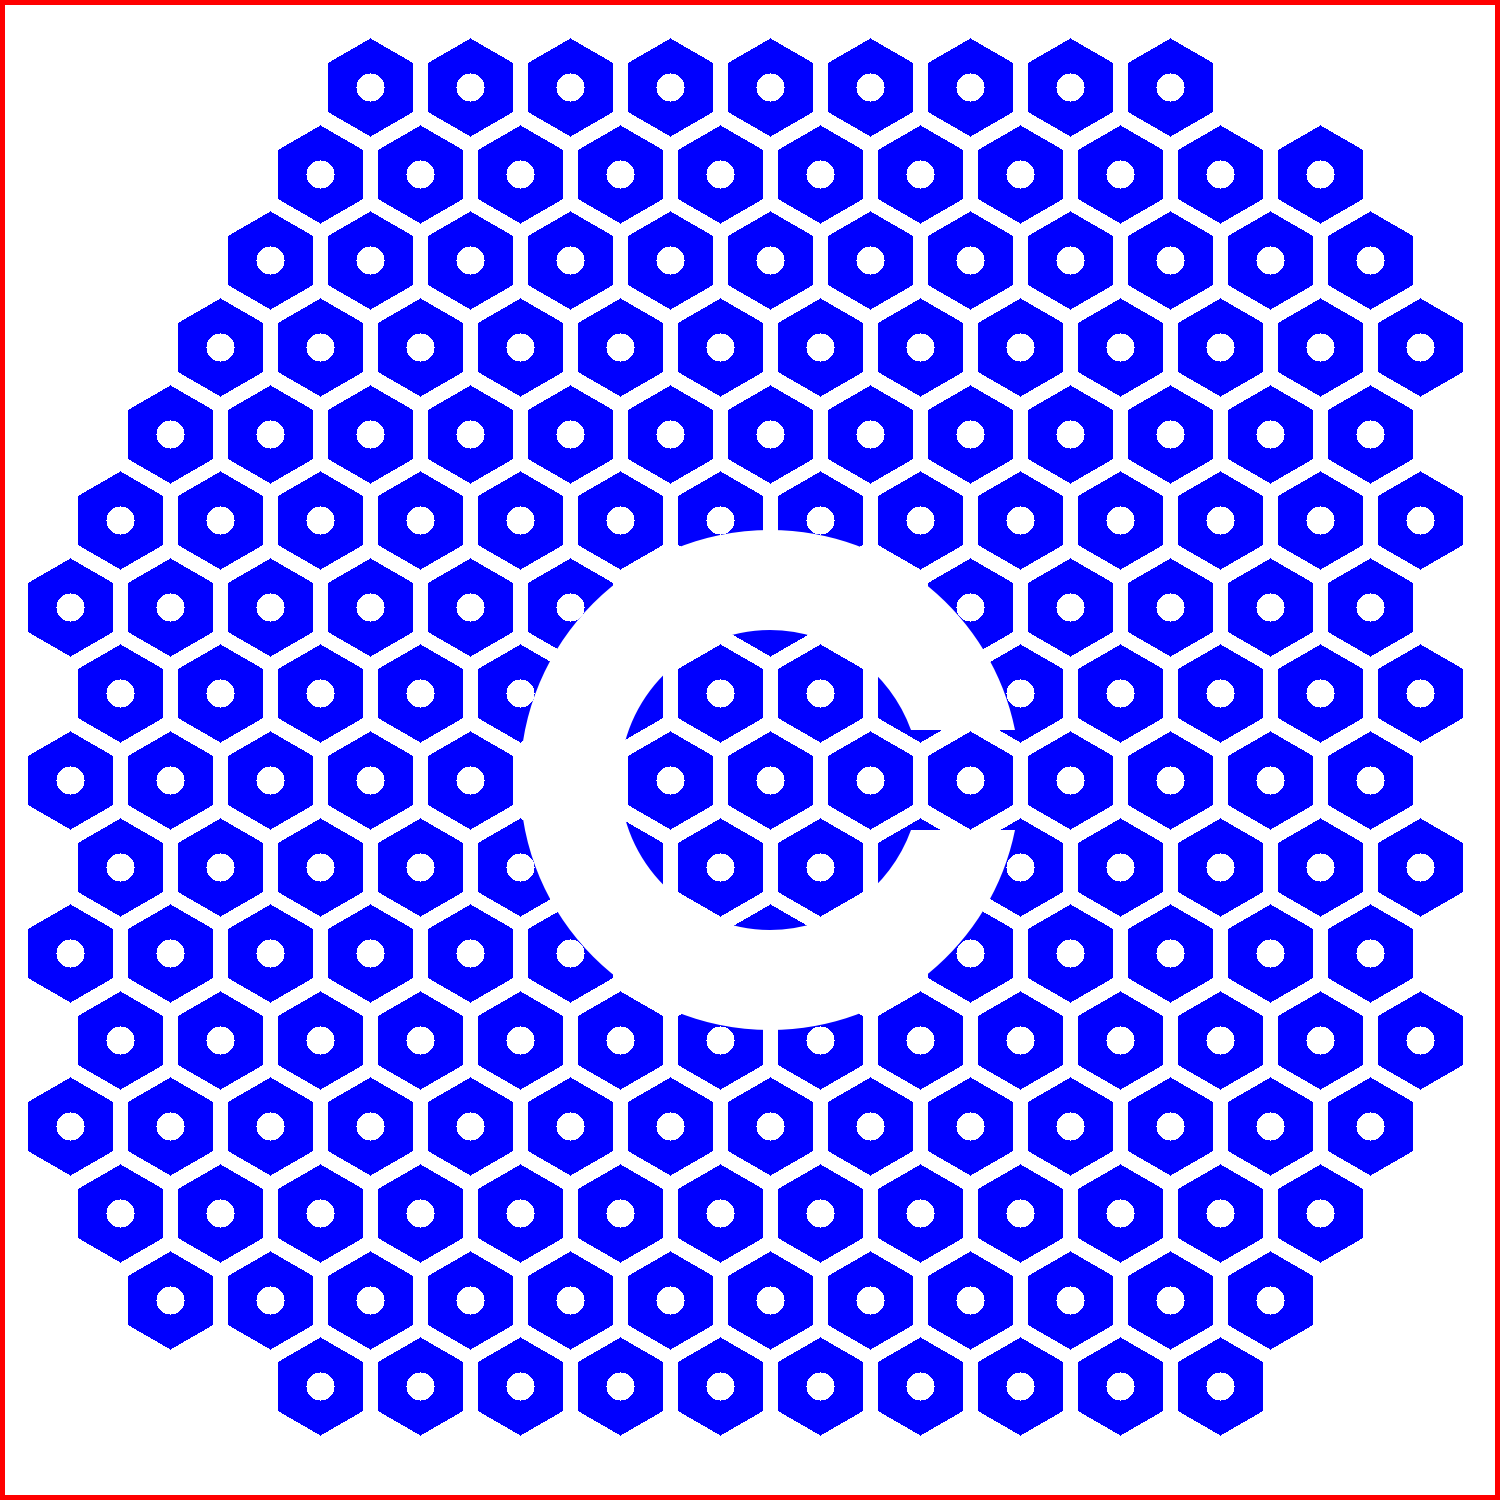

In [15]:
overlay

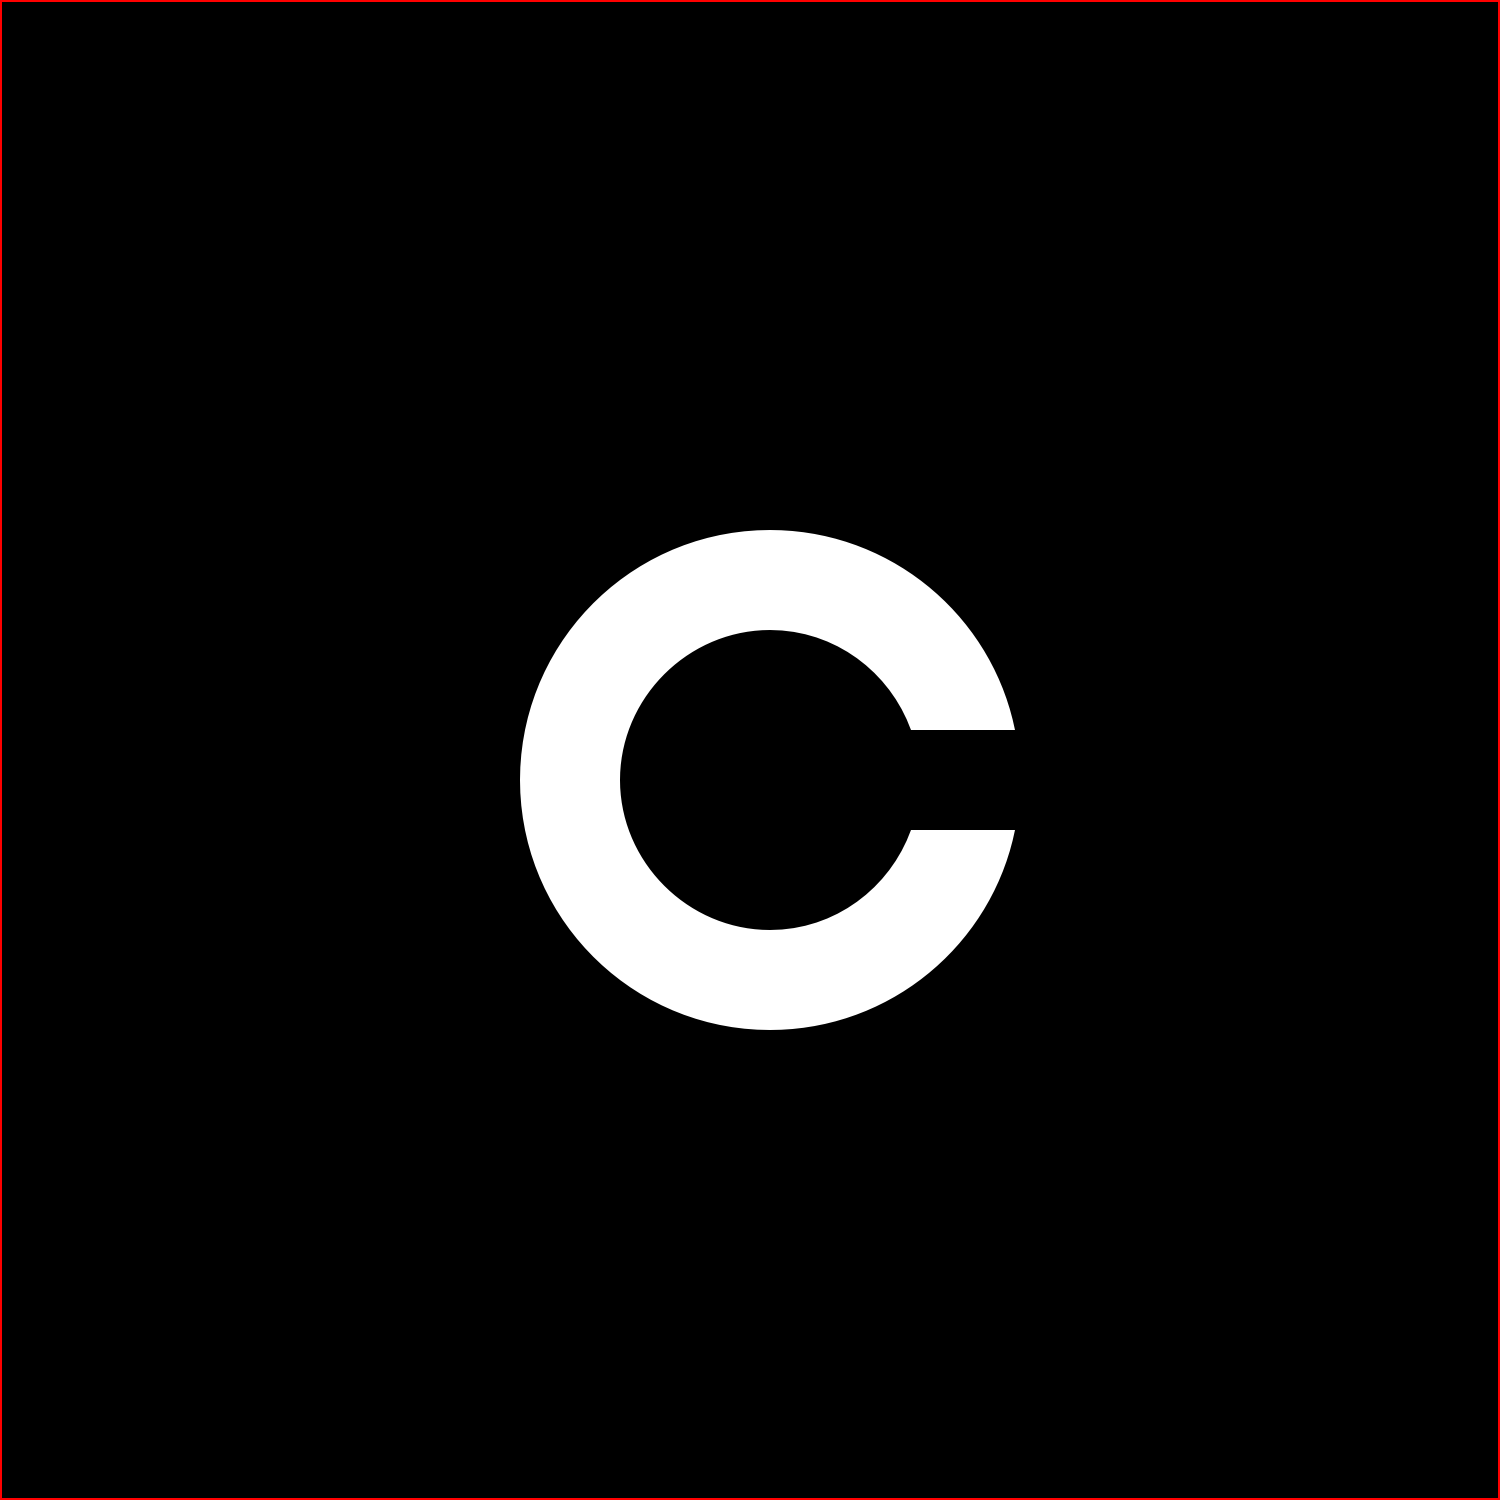

In [16]:
projected

With rotation included

In [11]:
electrode_pixel_size = 100
electrode_label_number = 99 # TODO finding the central pixel of a given pattern needs to be automated
text = 'C'
letter_size = 5
position_user = (1.5,-1)
rotation = 60
overlay_rot, projected_rot = draw_overlay_projection_rotation(electrode_pixel_size, electrode_label_number, letter_size, position_user, text, rotation)

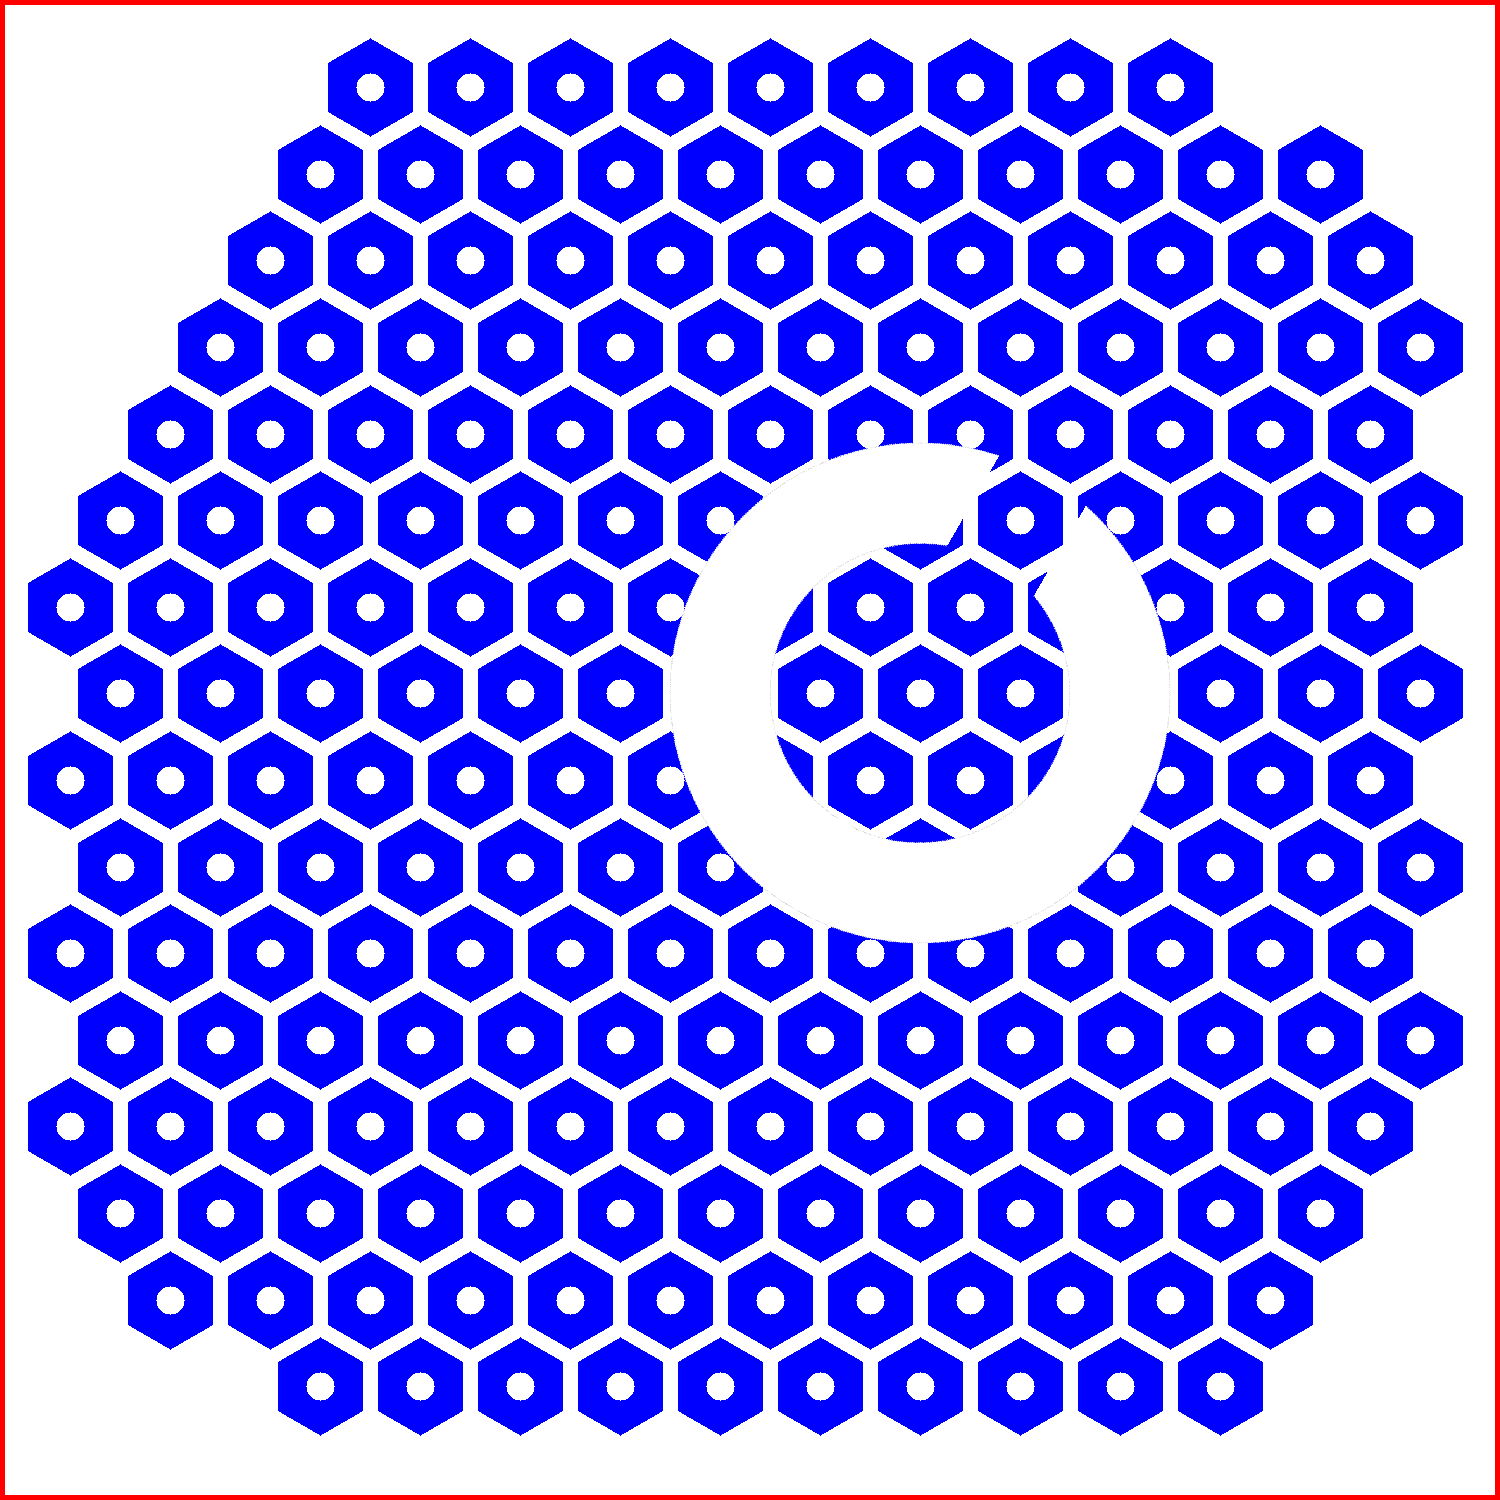

In [12]:
overlay_rot

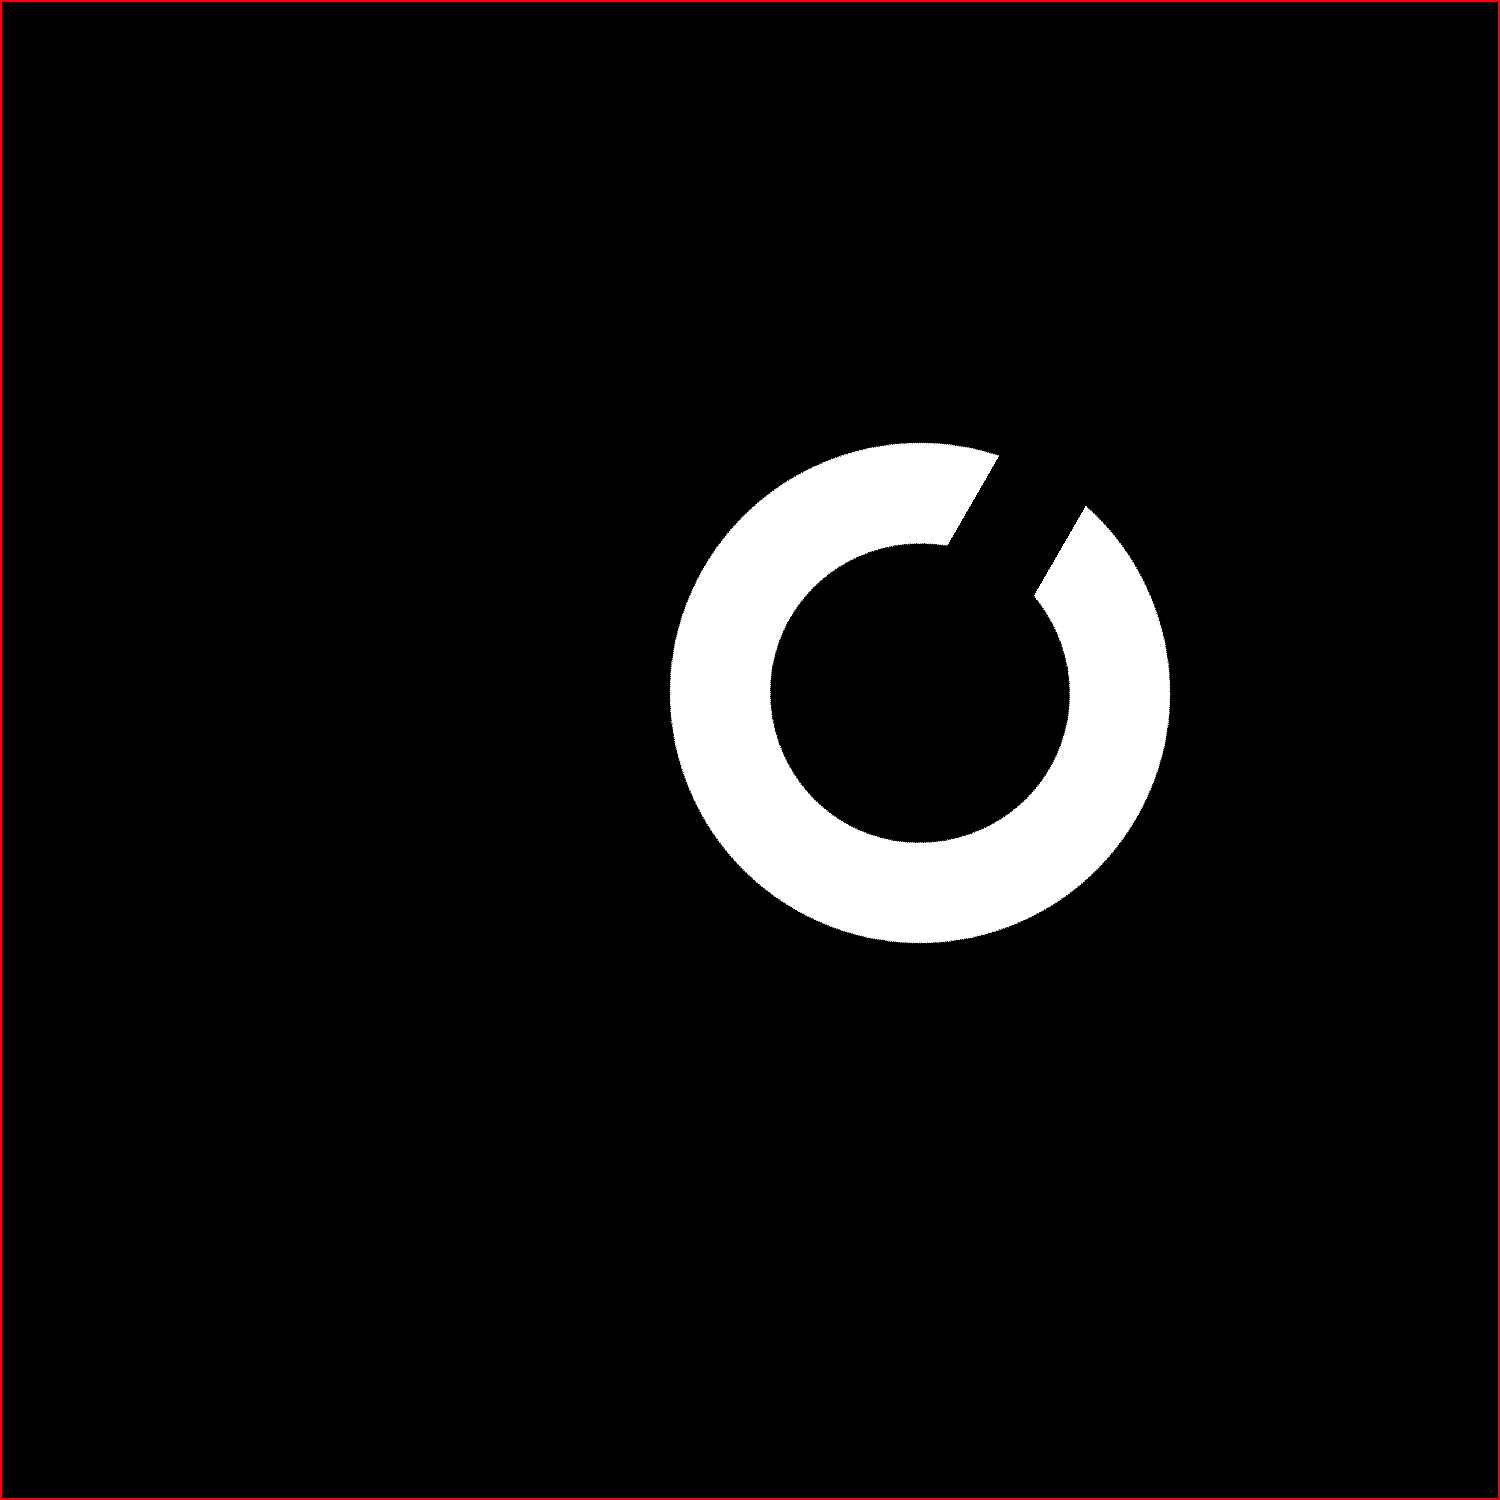

In [13]:
projected_rot